# 背景
- 图像几何变换的应用：
    - 人脸对齐 ref: http://www.zifuture.com/archives/face-alignment
    - 训练图像的预处理（填充成正方形）# e.g. yolov5 letter box  https://www.redsharknews.com/studio-broadcast/item/1870-what-you-need-to-know-about-aspect-ratios-and-letterboxing   mtcnn crop 
    - 图像增广 ref: yolov5 https://github.com/ultralytics/yolov5/blob/793383232fd52382d7bbd2a1ce771516afc15fe5/utils/augmentations.py
    - 车道线检测
    - etc

# 引入：变换矩阵

假如二维空间中存在点(x,y),我们想通过将x移动a，y移动b，得到新的坐标点(x’,y’),那么变换的公式可以写为


$$
x' = x + a\\
y' = y + b
$$

markdown 写数学式子：ref: https://personal.math.ubc.ca/~pwalls/math-python/jupyter/latex/ <br>
可以将上述等式写成矩阵形式：
    $$\begin{bmatrix}
       x' \\
       y' \\
       1
       \end{bmatrix}
      = \begin{bmatrix}
       1 & 0 & a \\
       0 &1 & b \\
       0 &0 & 1 
       \end{bmatrix}
      \begin{bmatrix}
       x \\ 
       y \\ 
       1
       \end{bmatrix} $$
       
    

<b>齐次坐标</b>: 使用N+1维坐标来表示N维坐标，例如在2D笛卡尔坐标系中加上额外变量w来形成2D齐次坐标系(x,y)⇒(x,y,w) 。齐次坐标具有规模不变性，同一点可以被无数个齐次坐标表达.(x,y,1)⇒(ax,ay,a) 齐次坐标转化为笛卡尔坐标可以通过同除最后一项得到。
在计算机图形学中，为了统一将平移、旋转、缩放等用矩阵表示，需要引入齐次坐标。（假设使用2x2的矩阵，是没有办法描述平移操作的，只有引入3x3矩阵形式，才能统一描述二维中的平移、旋转、缩放操作。同理必须使用4x4的矩阵才能统一描述三维的变换。
同样的我们可以使用矩阵来表示，缩放变换，旋转变换，相似变换，仿射变换和投影变换。直观理解如下图：<br>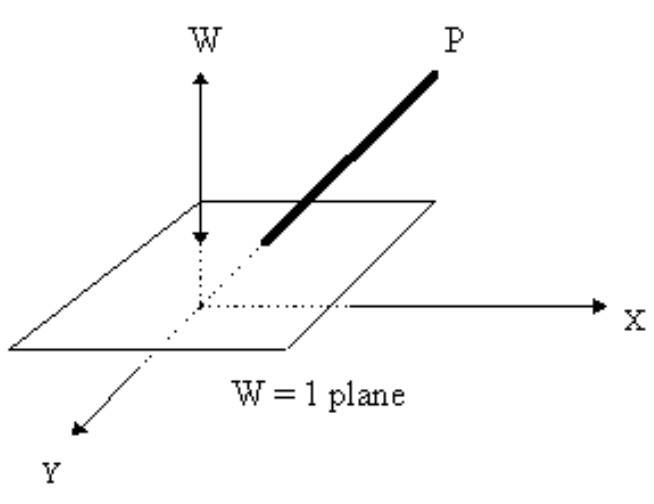


# 刚性变换(等距变换)（rigid transformation）
- 刚性变换： 只有物体的位置(平移变换)和朝向(旋转变换)发生改变，而形状不变，得到的变换称为刚性变换。刚性变换是最一般的变换
## 平移变换(translation)
$$ \begin{bmatrix}
1 & 0 & t_x \\
0 &1 & t_y \\
0 &0 & 1 
\end{bmatrix}$$

<div align = center>
<img src = "./translation.jpg" width = 150>
</div>

## 旋转变换(rotation) 
$$ \begin{bmatrix}
    \cos\theta & -\sin\theta & 0 \\
    \sin\theta & \cos\theta  & 0 \\
     0         &  0          & 1
     \end{bmatrix}$$
     
<div align = center>
<img src = "rotation.jpg" width = 150>
</div>


- 围绕原点（左上角）旋转
    - 二维中是绕着某一个点进行旋转，三维中是绕着某一个轴进行旋转

<div align = center>
<img src = "rotation2.jpg" width = 300>
</div>

如图所示，v点绕原点旋转theta得到v', 假设v(x,y), 那么v'(x',y')<br>
$
\begin{equation}
x = r\cos\phi \quad\quad\quad\ y = r\sin\phi \\
x' = r\cos(\theta + \phi) \quad y' = r\sin(\theta + \theta) \\
\end{equation}


$
通过三角函数展开得到<br>
$
\begin{equation}
x' = r\cos\theta\cos\phi - r\sin\theta\sin\phi \\
y' = r\sin\theta\cos\phi + r\cos\theta\sin\phi
\end{equation}
\begin{equation}
r^2 = x^2 + y^2
\end{equation}

$

写成矩阵的形式为：
$\begin{bmatrix}
    x' \\
    y'
    \end{bmatrix}
    = \begin{bmatrix}
    \cos\theta & -\sin\theta \\
    \sin\theta & \cos\theta
    \end{bmatrix}
    \begin{bmatrix}
    x  \\ 
    y
    \end{bmatrix}$
<b>记住！！！！！</b>

## 绕任意点旋转
- 绕原点的旋转是二维旋转最基本的情况，当我们需要进行绕任意点旋转时，我们可以把这种情况转换到绕原点的旋转，思路如下：

    - 首先将旋转点移动到原点处
    - 执行如图2描述的绕原点旋转
    - 再将旋转点平移回原来的位置


<div align = center>
<img src = "./rotation3.jpg" width = 400>     
</div>

也就是说在处理绕任意点旋转的情况下，我们都需要执行两次平移。假设点为v(x,y),平移矩阵为T, 旋转后的点应该为：
$$
\begin{equation}
v' = T(x,y)*R*T(-x,-y)*v
\end{equation}
$$

$$ \begin{bmatrix}
    1 & 0 & t_x \\
    0 &1 & t_y \\
    0 &0 & 1 
    \end{bmatrix}$$

$$ \begin{bmatrix}
    \cos\theta & -\sin\theta & 0 \\
    \sin\theta & \cos\theta  & 0 \\
     0         &  0          & 1
     \end{bmatrix}$$

$$ \begin{bmatrix}
    1 & 0 & -t_x \\
    0 &1 & -t_y \\
    0 &0 & 1 
    \end{bmatrix}$$

$$ 
    M = 
    \begin{bmatrix}
        1 & 0 & t_x \\
        0 &1 & t_y \\
        0 &0 & 1 
    \end{bmatrix}
    \begin{bmatrix}
        \cos\theta & -\sin\theta & 0 \\
        \sin\theta & \cos\theta  & 0 \\
         0         &  0          & 1
    \end{bmatrix}
    \begin{bmatrix}
        1 & 0 & -t_x \\
        0 &1 & -t_y \\
        0 &0 & 1 
    \end{bmatrix}
    = 
    \begin{bmatrix}
        \cos\theta & -\sin\theta & (1-\cos\theta)tx + ty*\sin\theta) \\
        \sin\theta & \cos\theta  & (1-\cos\theta)ty + tx*\sin\theta) \\
         0         &  0          & 1
    \end{bmatrix}$$

# 缩放变换(scaling)

$$ \begin{bmatrix}
s_x & 0 & 0 \\
0   &s_y & 0 \\
0   &0 & 1 
\end{bmatrix}$$

<div align = center>
<img src = "./scaling.jpg" width = 120>
</div>

# 切向变换(shear)
$$ \begin{bmatrix}
    0 & shx & 0 \\
    shy & 0 & 0 \\
    0 & 0 & 1 
\end{bmatrix}$$

<div align = center>
<img src = "./shear.jpg" width = 100>     
</div>

# 相似变换（刚性变换 + 均匀缩放）

$$ \begin{bmatrix}
    s*r_{11} & s*r_{12} & tx \\
    s*r_{21} & s*r_{22} & ty \\
     0         &  0          & 1
     \end{bmatrix}$$
<br>
<br>
其中，$r_{ij}$都是$\theta$的函数(绕z轴旋转，如果是三维的话)<br>
左上角2×2矩阵为旋转部分，tx和ty为平移因子，它有4个自由度(未知数)，即旋转，x方向平移，y方向平移和缩放因子s。相似变换前后长度比，夹角等保持不变

# 仿射变换（affine transformation）

- 仿射变换和相似变换近似，不同之处在于相似变换具有单一旋转因子和单一缩放因子，仿射变换具有两个旋转因子和两个缩放因子，因此具有6个自由度。不具有保角性和保持距离比的性质，但是原图平行线变换后仍然是平行线。仿射变换主要包括平移变换、旋转变换、缩放变换（也叫尺度变换）、倾斜变换（也叫错切变换、剪切变换、偏移变换）、翻转变换，有六个自由度。
- 简而言之，在2d平面内，仿射变换包括的变换都可以用6个参数来表示。

# 理论方面的结论#!!!!! 如果对上面的细节不够理解，没关系，这里的结论一定要知道！！！
- 对于变换操作，左乘一个3x3矩阵即对目标做一次变换
    - 变换先后顺序是有定义的，这也与矩阵乘法大部分时候没有交换律一样
    - 比如先平移后旋转，先旋转后平移是不同的
    - 旋转、缩放、平移永远都是相对<b>原点进行</b>的。如果需要相对不同点，则可以TRT，第一个T是把特定点平移到原点，R做旋转，第二个T是把原点平移到目标点
- 对于变换矩阵，可以把所有左乘的矩阵乘在一起，作为最终的变换矩阵。这也与矩阵乘法的分配律一样
    - 因此当遇到需要考虑的变换时，可以考虑分解为多个操作的联合实现

$$\begin{bmatrix}
    x' \\
    y' \\
    1
    \end{bmatrix}
    = \begin{bmatrix}
    a_1 & b_1 & c_1 \\
    a_2 & b_2 & c_2 \\
    0   & 0   & 1  
    \end{bmatrix}
    \begin{bmatrix}
    x  \\ 
    y  \\
    1
    \end{bmatrix}$$

# 一些变换的api演示

(325, 263, 3)

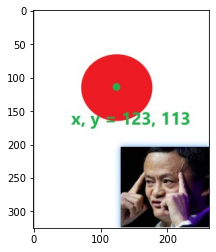

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

src_img = cv2.imread("my_test.jpg")
h, w, _ = src_img.shape
plt.imshow(src_img[..., ::-1])

def affine_show(M):
    new_img = cv2.warpAffine(src_img, M[:2], (w, h)) # src_img全局变量
    plt.imshow(new_img[..., ::-1])
    
src_img.shape

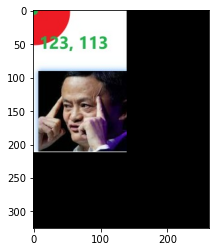

In [2]:
Rcx, Rcy = 123., 113. # Rotation center

T = np.array([   # 往左上角移动
    [1, 0, -Rcx],
    [0, 1, -Rcy],
    [0, 0, 1]
])
affine_show(T)

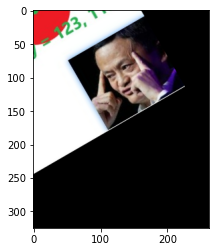

In [3]:
theta = - 30 / 180 * np.pi 

R = np.array([ # 旋转
    [np.cos(theta), -np.sin(theta), 0],
    [np.sin(theta), np.cos(theta), 0],
    [0, 0, 1]
])
affine_show(R @ T)

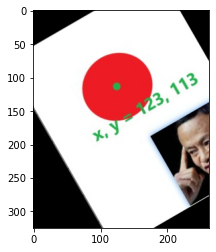

In [4]:
T2 = np.array([ # 移动回去
    [1, 0, Rcx],
    [0, 1, Rcy],
    [0, 0, 1]
])
affine_show(T2 @ R @ T) # 顺序一定要搞清楚!!!!!!!!

[[  0.8660254    0.5        -40.02112467]
 [ -0.5          0.8660254   76.63912937]
 [  0.           0.           1.        ]]
[[  0.8660254   -0.5         72.97887533]
 [  0.5          0.8660254  -46.36087063]]


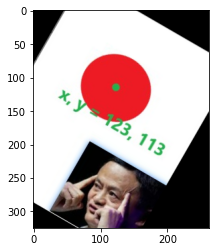

In [5]:
print(T2 @ R @ T)
M = cv2.getRotationMatrix2D((Rcx, Rcy), -30, 1) # 顺时针30°
print(M)
affine_show(M)

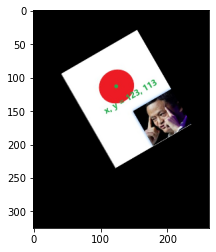

In [6]:
x = 123
y = 113

T = np.array([ 
    [1, 0, -x],
    [0, 1, -y],
    [0, 0, 1]
])

S = np.array([
    [0.5, 0, 0],
    [0, 0.5, 0],
    [0, 0, 1]
])

theta = 30 / 180 * np.pi
R = np.array([
    [np.cos(theta), np.sin(theta), 0],
    [-np.sin(theta), np.cos(theta), 0],
    [0, 0, 1]
])

T2 = np.array([
    [1, 0, x],
    [0, 1, y],
    [0, 0, 1]
])
affine_show(T2 @ R @ S @ T) # 先移到原点，再旋转，再缩放，再移动回来

# 最小二乘法求仿射矩阵

 $$
 a^{'}_{x} = a_{x}m_{00}+a_{y}m_{01}+m_{02}
$$
$$
 a^{'}_{y} = a_{x}m_{10}+a_{y}m_{11}+m_{12}
$$
   
$$
 b^{'}_{x} = b_{x}m_{00}+b_{y}m_{01}+m_{02}
$$
$$
 b^{'}_{y} = b_{x}m_{10}+b_{y}m_{11}+m_{12}
$$
   
$$
 c^{'}_{x} = c_{x}m_{00}+c_{y}m_{01}+m_{02}
$$
$$
 c^{'}_{y} = c_{x}m_{10}+c_{y}m_{11}+m_{12}
$$

* （由于是乘加）问题转换为矩阵乘法，提取出其中的系数部分

* latex 和 markdown的使用
$$
\begin{gathered}
\begin{bmatrix} 
a_x & a_y & 1 & 0   & 0   & 0 \\ 
0   & 0   & 0 & a_x & a_y & 1 \\
b_x & b_y & 1 & 0   & 0   & 0 \\ 
0   & 0   & 0 & b_x & b_y & 1 \\
c_x & c_y & 1 & 0   & 0   & 0 \\ 
0   & 0   & 0 & c_x & c_y & 1 \\
\end{bmatrix}
\begin{bmatrix} 
m_{00} \\
m_{01} \\
m_{02} \\
m_{10} \\
m_{11} \\
m_{12} \\
\end{bmatrix}
=
\begin{bmatrix} 
a'_x \\
a'_y \\
b'_x \\
b'_y \\
c'_x \\
c'_y \\
\end{bmatrix}
\end{gathered}
$$
* 其中
$$A = \begin{bmatrix}
a_x & a_y & 1 & 0   & 0   & 0 \\
0   & 0   & 0 & a_x & a_y & 1 \\
b_x & b_y & 1 & 0   & 0   & 0 \\
0   & 0   & 0 & b_x & b_y & 1 \\
c_x & c_y & 1 & 0   & 0   & 0 \\
0   & 0   & 0 & c_x & c_y & 1 
\end{bmatrix}
\quad
M = 
\begin{bmatrix} 
m_{00} \\
m_{01} \\
m_{02} \\
m_{10} \\
m_{11} \\
m_{12} \\
\end{bmatrix}
\quad
B = \begin{bmatrix} 
a'_x \\
a'_y \\
b'_x \\
b'_y \\
c'_x \\
c'_y \\
\end{bmatrix}$$

* 定义最小二乘法
$$ argmin||AM - B||_{2}^2 $$
$$ M = (A^T A) ^{-1}A^TB $$

In [1]:
import numpy as np
A = [
    [0, 0],
    [50, 0],
    [50,50]
]

B = [
    [30, 30],
    [130, 30],
    [130, 130]
]

(ax, ay), (bx, by), (cx, cy) = A[0], A[1], A[2]
(dst_ax, dst_ay), (dst_bx, dst_by), (dst_cx, dst_cy) = B[0], B[1], B[2]

A = np.array([[ax, ay, 1, 0, 0, 0],
    [0, 0,   0, ax, ay, 1],
    [bx, by, 1, 0, 0, 0],
    [0, 0,   0, bx, by, 1],
    [cx, cy, 1, 0, 0, 0],
    [0, 0,   0, cx, cy, 1]
])

B = np.array([
    dst_ax,
    dst_ay,
    dst_bx,
    dst_by,
    dst_cx,
    dst_cy
]).reshape(6,1)

M = np.linalg.inv(A.T@A)@A.T@B # linear algebra
M.reshape(2,3)

array([[ 2.,  0., 30.],
       [ 0.,  2., 30.]])

In [9]:
# 准备数据

A = [
    [0,0],
    [50,0],
    [50,50]
]

B = [
    [30, 30],
    [130, 30],
    [130, 130]
]


(ax,   ay), (bx,   by), (cx,   cy) = A[0], A[1], A[2]
(dax, day), (dbx, dby), (dcx, dcy) = B[0], B[1], B[2]


X = np.array([
    [ax, ay, 1, 0,  0,  0],
    [0,  0,  0, ax, ay, 1],
    [bx, by, 1, 0,  0,  0],
    [0,  0,  0, bx, by, 1],
    [cx, cy, 1, 0,  0,  0],
    [0,  0,  0, cx, cy, 1]
])

Y = np.array([
    dax,
    day,
    dbx,
    dby,
    dcx,
    dcy
]).reshape(6, 1)

# 权重初始化和其他变量的初始化
theta = np.random.normal(size = (6,1)) # kp: weight init
lr = 3e-4

# kp: Learning schedule 
schedule = {
    20000: 1e-5,
    28000: 1e-6
}


for i in range(30000):
    if i in schedule:
        lr = schedule[i]
        print(f"set lr = {lr}")
        
    predict = X @ theta
    loss = 0.5 * np.sum((predict - Y)**2)
    
    if i % 3000 == 0:
        print(f"iter {i} loss = {loss:g}")

    # 矩阵求导 del_B = A^T @ G
    del_t = X.T @ (predict - Y)
    theta = theta - lr * del_t
    
np.round(theta.reshape(2,3)) # round四舍五入

iter 0 loss = 40806.5
iter 3000 loss = 155.967
iter 6000 loss = 25.7927
iter 9000 loss = 4.26543
iter 12000 loss = 0.705388
iter 15000 loss = 0.116652
iter 18000 loss = 0.0192912
set lr = 1e-05
iter 21000 loss = 0.0056971
iter 24000 loss = 0.00536545
iter 27000 loss = 0.00505311
set lr = 1e-06


array([[ 2., -0., 30.],
       [ 0.,  2., 30.]])

## 我们得到的affine matrix 能够干什么呢？

kj shape (270, 283, 3)


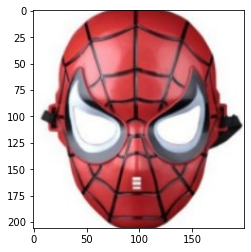

In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
kj_img = cv2.imread("kj.jpg") # (270, 283, 3)  bgr
mask_img = cv2.imread("spider_man.jpg")
plt.imshow(kj_img[...,::-1])  # bgr --> rgb to show
print("kj shape", kj_img.shape)
plt.imshow(mask_img[...,::-1])


## 求出坐标映射的变换矩阵

In [11]:
# 现在我们要做什么呢？
# 我们要把mask 弄到狗的脸上，眼睛对眼睛，嘴巴对嘴巴
# mask points
A = [    
    [59, 112], # xy
    [140,112],
    [96, 161]
]

# kj points
B = [
    [160, 61],
    [212, 107],
    [141, 134]
]

(ax,   ay), (bx,   by), (cx,   cy) = A[0], A[1], A[2]
(dax, day), (dbx, dby), (dcx, dcy) = B[0], B[1], B[2]

A = np.array([
    [ax, ay, 1, 0,  0,  0],
    [0,  0,  0, ax, ay, 1],
    [bx, by, 1, 0,  0,  0],
    [0,  0,  0, bx, by, 1],
    [cx, cy, 1, 0,  0,  0],
    [0,  0,  0, cx, cy, 1]
])

B = np.array([
    dax,
    day,
    dbx,
    dby,
    dcx,
    dcy
]).reshape(6, 1)

M = np.linalg.inv(A.T @ A) @ A.T @ B
M = M.reshape(2, 3)
M

array([[  0.64197531,  -0.87251197, 219.84479718],
       [  0.56790123,   1.06097254, -91.335097  ]])

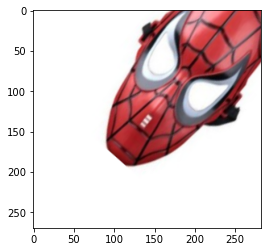

In [12]:
# 看看mask被变换后成什么样子
kj_img = cv2.imread("kj.jpg") # (270, 283, 3)  bgr
mask_img = cv2.imread("spider_man.jpg")

kj_h, kj_w, _ = kj_img.shape  # hwc
out_mask = cv2.warpAffine(mask_img, M, (kj_w, kj_h), borderValue= (255,255,255))
plt.imshow(out_mask[...,::-1])

## 对每个像素计算权重

In [13]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

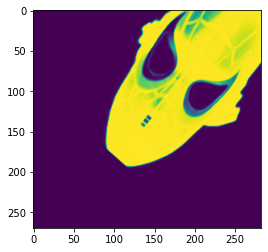

In [14]:
# 接着我们将它扣除抠出来，对于这个简单的图来说，我们只要去掉白色的地方即可。 像素值与白色做对比，越小则越是白色 
weight = np.abs(out_mask / 255 - 1)
weight = np.fmax(weight[...,0], weight[...,1], weight[...,2]) # 取每个通道的最大值  ref: https://numpy.org/doc/stable/reference/generated/numpy.fmax.html
# 变换权重来 加强/减弱某点的原始权重， 如果该点权重小于0.3，则让它趋近于0，如果大于0.3，让它大于零
weight = sigmoid((weight - 0.3) * 10)
weight = weight.reshape(*weight.shape, 1) # 1--> 为了要plt.imshow
plt.imshow(weight[...,0])

## 合并 

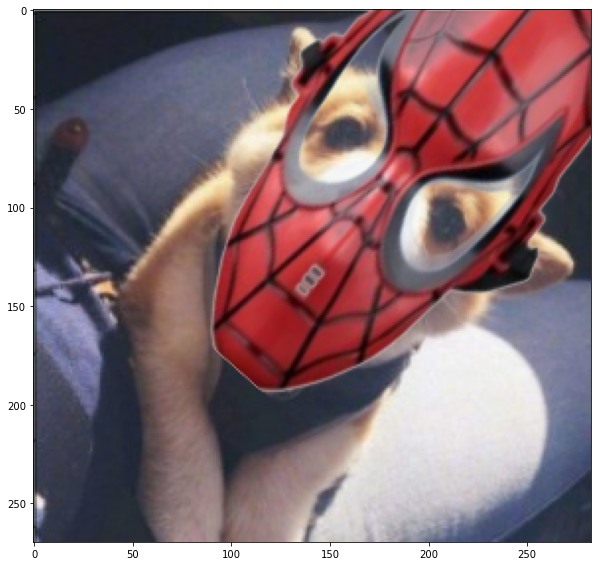

In [15]:
merge = (weight * out_mask + kj_img * (1 - weight)).astype(np.uint8) # 合并mask和kj图像，weight是mask的权重
plt.figure(figsize=(10,10))
plt.imshow(merge[...,::-1])

# 代码应用案例：

In [16]:
import numpy as np
import struct
import random
import matplotlib.pyplot as plt
import pandas as pd
import math
import cv2
import math

uint8
200


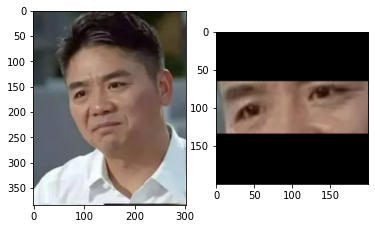

In [17]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def crop_resize_to(src, roi, dst):

    # -------------- ROI cropping ------------------
    x, y, r, b = roi
    roi_img = src[y: b,x: r,...]
    rh, rw, _ = roi_img.shape

    # -------------- Transformation M ------------------
    dst_h, dst_w = dst.shape[:2]
    scale   = min(dst_h/rh, dst_w/rw) # 短边对齐，原图是分母
    t_w = -rw*0.5*scale + dst_w*0.5
    t_h = -rh*0.5*scale + dst_h*0.5

    M = np.array([[scale, 0, t_w],
                    [0, scale, t_h]])

    # -------------- WarpAffine ------------------
    cv2.warpAffine(roi_img, M, (dst_w, dst_h), dst = dst)


img = cv2.imread("lqd.jpg")
plt.subplot(1, 2, 1)
plt.imshow(img[...,::-1])

dst = np.zeros((200,200,3), dtype= np.uint8)              #! 一般的，我们都主动去指定一个array 是什么dtype
crop_resize_to(img, roi = (63, 138, 203, 186), dst = dst) #! 一定一定一定要用与src相同的dtype来承接
print(dst.dtype)
print(np.max(dst))

plt.subplot(1, 2, 2)
plt.imshow(dst[...,::-1])


# 